<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/snsscrapetweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7eb20c59b46b80ca0d1708276f9e1d37991c06a539a2e4533648997afe9b8b83
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [36]:
keywords=['kanjuruhan']
start="2022–09–01"
end ="2022–10–03"
max_num=10
fname='tweet.json' 
languages=['id','en']

In [37]:
import pandas as pd
datatw=[]

In [38]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [39]:
datatw

['Ternyata Gas Air Mata di Tragedi Kanjuruhan Kedaluwarsa Sejak 2021\nsumber: https://t.co/CvNLjl7yVb\n\n#KanjuruhanDisaster #malangberduka #aremania #persebaya #TragediKanjuruhan \nSambo\nMalang\nsuporter\nAremania\nAiman https://t.co/WCtKpAPJS4',
 'Terungkap, Tujuh Fakta Terbaru Tragedi Kanjuruhan https://t.co/TjbkGDS6s9',
 '@SayaKusuma @Juli_Suryawan @NenkMonica @detikcom @DivHumas_Polri Rudet oii, ini bapak kadiv humas yg bilang korban kanjuruhan meninggal karena kehabisan oksigen ya???',
 'Tuntut institusi Kepolisian terkait insiden meninggalnya suporter Arema di Kanjuruhan - Tandatangani Petisi! https://t.co/QVja0xSWyq via @ChangeOrg_ID',
 'https://t.co/QefUbzDFZt\n\nIni salah @aniesbaswedan  BALI banjir\n\nKasus KANJURUHAN  salah @aniesbaswedan \n\nKasus KM 50 salah @aniesbaswedan\n\nHARUN MASIKU kabur  salah @aniesbaswedan\n\nTolong pak @ListyoSigitP tangkap @aniesbaswedan\n\nBetul gak nih pak @jokowi \n\nPuas kalian!!!!',
 'Polisi Periksa Enam Tersangka Tragedi Kanjuruhan, Sim

In [26]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


In [40]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [41]:
documents_clean[0:5]

['nyata gas air mata tragedi kanjuruhan kedaluwarsa sejak sumber https t co cvnljlyvb kanjuruhandisaster malangberduka aremania baya tragedikanjuruhan sambo malang suporter aremania aiman https t co wctkpapjs',
 'ungkap tujuh fakta baru tragedi kanjuruhan https t co tjbkgdss',
 'sayakusuma juli suryawan nenkmonica detikcom divhumas polri rudet oii bapak kadiv humas yg bilang korban kanjuruhan tinggal habis oksigen',
 'tuntut institusi polisi kait insiden tinggal suporter arema kanjuruhan tandatangani petisi https t co qvjaxswyq via changeorg id',
 'https t co qefubzdfzt salah aniesbaswedan bal banjir kasus kanjuruhan salah aniesbaswedan kasus km salah aniesbaswedan harun mas kabur salah aniesbaswedan pak listyosigitp tangkap aniesbaswedan betul gak nih pak jokowi puas kalian']

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

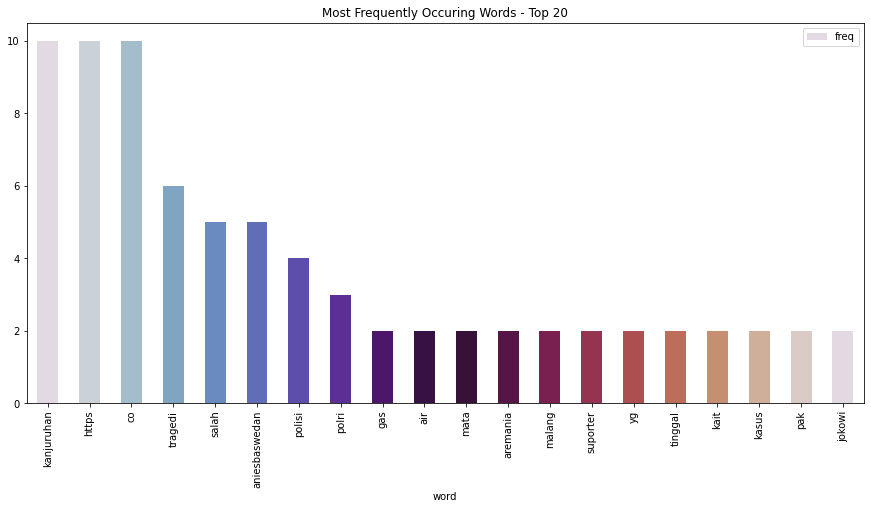

In [43]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [44]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [45]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 kedaluarsa
 mata
 ratus
 polri
 https
 sebut
 olvmulct
 co
 nyawa
 biru
Cluster 1:
 co
 https
 kanjuruhan
 tragedi
 polisi
 masing
 aremania
 jatim
 suporter
 tinggal
Cluster 2:
 aniesbaswedan
 salah
 pak
 kasus
 co
 harun
 qefubzdfzt
 puas
 https
 listyosigitp




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


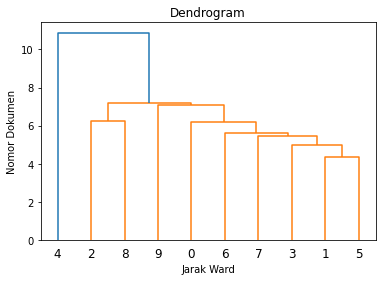

In [46]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

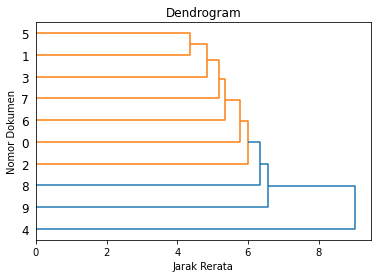

In [47]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

https://www.freecodecamp.org/news/python-web-scraping-tutorial/
https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721